In [56]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Importing Data

In [57]:
housing_df = pd.read_csv(r"F:\PGD_UpGrad\Machine_learning_2\Advance_Regression_Assignment\Data\train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
housing_df.shape

(1460, 81)

### Missing value treatment

In [59]:
percentage = ((housing_df.isnull().sum() / housing_df.shape[0]) *100).sort_values(ascending=False)
Total = housing_df.isnull().sum().sort_values(ascending=False)
miss_data = pd.concat([Total, percentage], axis=1, keys=["Total", "Percentage"])
miss_data = miss_data[miss_data.Total >= 1]
miss_data

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [60]:
percentage = ((housing_df.isnull().sum() / housing_df.shape[0]) *100).sort_values(ascending=False)
Total = housing_df.isnull().sum().sort_values(ascending=False)
miss_data = pd.concat([Total, percentage], axis=1, keys=["Total", "Percentage"])
miss_data = miss_data[miss_data.Total >= 1]
miss_data

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [61]:
col_to_drop = miss_data.index
for col in col_to_drop:
    print(housing_df[col].value_counts(dropna = False))
    print("------------------------------------------------")

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64
------------------------------------------------
NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
------------------------------------------------
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
------------------------------------------------
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
------------------------------------------------
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
------------------------------------------------
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13

In [62]:
year_build = pd.concat([housing_df.YearBuilt, housing_df.GarageYrBlt], axis=1, keys=["House_Build", "Gar_Build"])
year_build.describe()

,House_Build,Gar_Build
count,1460.000000,1379.000000
mean,1971.267808,1978.506164
std,30.202904,24.689725
min,1872.000000,1900.000000
25%,1954.000000,1961.000000
50%,1973.000000,1980.000000
75%,2000.000000,2002.000000
max,2010.000000,2010.000000


In [63]:
(year_build.House_Build == year_build.Gar_Build).sum() / year_build.shape[0] * 100

74.58904109589041

For `GarageYrBlt` 75% of value are same as `YearBuilt` columns so we can replace NaN value with respective year of build value

In [64]:
year_build["Gar_Build"] = np.where(year_build.Gar_Build.isnull(), year_build.House_Build, year_build.Gar_Build)

In [65]:
(year_build.House_Build == year_build.Gar_Build).sum() / year_build.shape[0] * 100

80.13698630136986

We can Fill the LotFrontage value with median of neighborhood lot frontage cause they almost share the same space between streets

In [66]:
lot_frontage = housing_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
lot_frontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [67]:
housing_df["LotFrontage"] = housing_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

If we look every unique value into features realted to the Garage there is one feature which describe the Type of the garage but it can not include the value for no garage available so the `NA` value is for the garage is not available so instead of treating this `NA` value as missing we can replace this as `No Garage`

In [68]:
housing_df["PoolQC"] = housing_df["PoolQC"].fillna("No Pool")
housing_df["MiscFeature"] = housing_df["MiscFeature"].fillna("no misc feature")
housing_df["Alley"] = housing_df["Alley"].fillna("No Alley Access")
housing_df["Fence"] = housing_df["Fence"].fillna("No Fence")

In [69]:
housing_df["LotFrontage"] = housing_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [70]:
housing_df.GarageType = np.where(housing_df.GarageType.isnull(), "No Garage", housing_df.GarageType)
housing_df.GarageFinish = np.where(housing_df.GarageFinish.isnull(), "No Garage", housing_df.GarageFinish)
housing_df.GarageCond = np.where(housing_df.GarageCond.isnull(), "No Garage", housing_df.GarageCond)
housing_df.GarageQual = np.where(housing_df.GarageQual.isnull(), "No Garage", housing_df.GarageQual)
housing_df.GarageYrBlt = np.where(housing_df.GarageYrBlt.isnull(), housing_df.YearBuilt, housing_df.GarageYrBlt)

In [71]:
housing_df.BsmtFinType2 = np.where(housing_df.BsmtFinType2.isnull(), "No Basement", housing_df.BsmtFinType2)
housing_df.BsmtExposure = np.where(housing_df.BsmtExposure.isnull(), "No Basement", housing_df.BsmtExposure)
housing_df.BsmtQual = np.where(housing_df.BsmtQual.isnull(), "No Basement", housing_df.BsmtQual)
housing_df.BsmtFinType1 = np.where(housing_df.BsmtFinType1.isnull(), "No Basement", housing_df.BsmtFinType1)
housing_df.BsmtCond = np.where(housing_df.BsmtCond.isnull(), "No Basement", housing_df.BsmtCond)

There is Still some columns which has lots of missing value we can replace the `NA` value from the `FireplaceQu` as `No fireplace` as messioned in Data directory. 

In [72]:
housing_df.FireplaceQu = np.where(housing_df.FireplaceQu.isnull(), "No Fireplace", housing_df.FireplaceQu)

In [73]:
percentage = ((housing_df.isnull().sum() / housing_df.shape[0]) *100).sort_values(ascending=False)
Total = housing_df.isnull().sum().sort_values(ascending=False)
miss_data = pd.concat([Total, percentage], axis=1, keys=["Total", "Percentage"])
miss_data = miss_data[miss_data.Total >= 1]
miss_data

,Total,Percentage
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493


`MasVnrArea and MasVnrType` : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [74]:
housing_df["MasVnrType"] = housing_df["MasVnrType"].fillna("None")
housing_df["MasVnrArea"] = housing_df["MasVnrArea"].fillna(0)

In [75]:
housing_df['Electrical'] = housing_df['Electrical'].fillna(housing_df['Electrical'].mode()[0])

In [76]:
housing_df.isnull().sum().max()

0

In [77]:
housing_df.shape

(1460, 81)

In [78]:
housing_df = housing_df.drop_duplicates()

In [79]:
housing_df.shape

(1460, 81)

There is no null value in dataframe

### Data Visualization

Distribution od Sale price on both scale

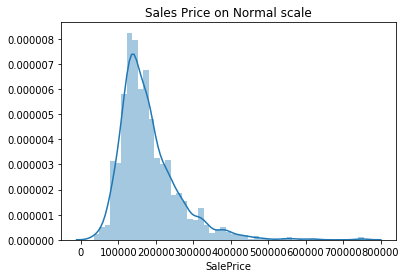

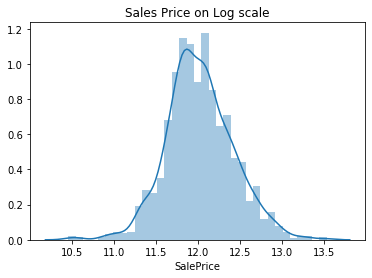

In [80]:
sns.distplot(housing_df['SalePrice'])
plt.title("Sales Price on Normal scale")
plt.show()
sns.distplot(np.log(housing_df.SalePrice))
plt.title("Sales Price on Log scale")
plt.show()

Correlation of all the numeric features with each other

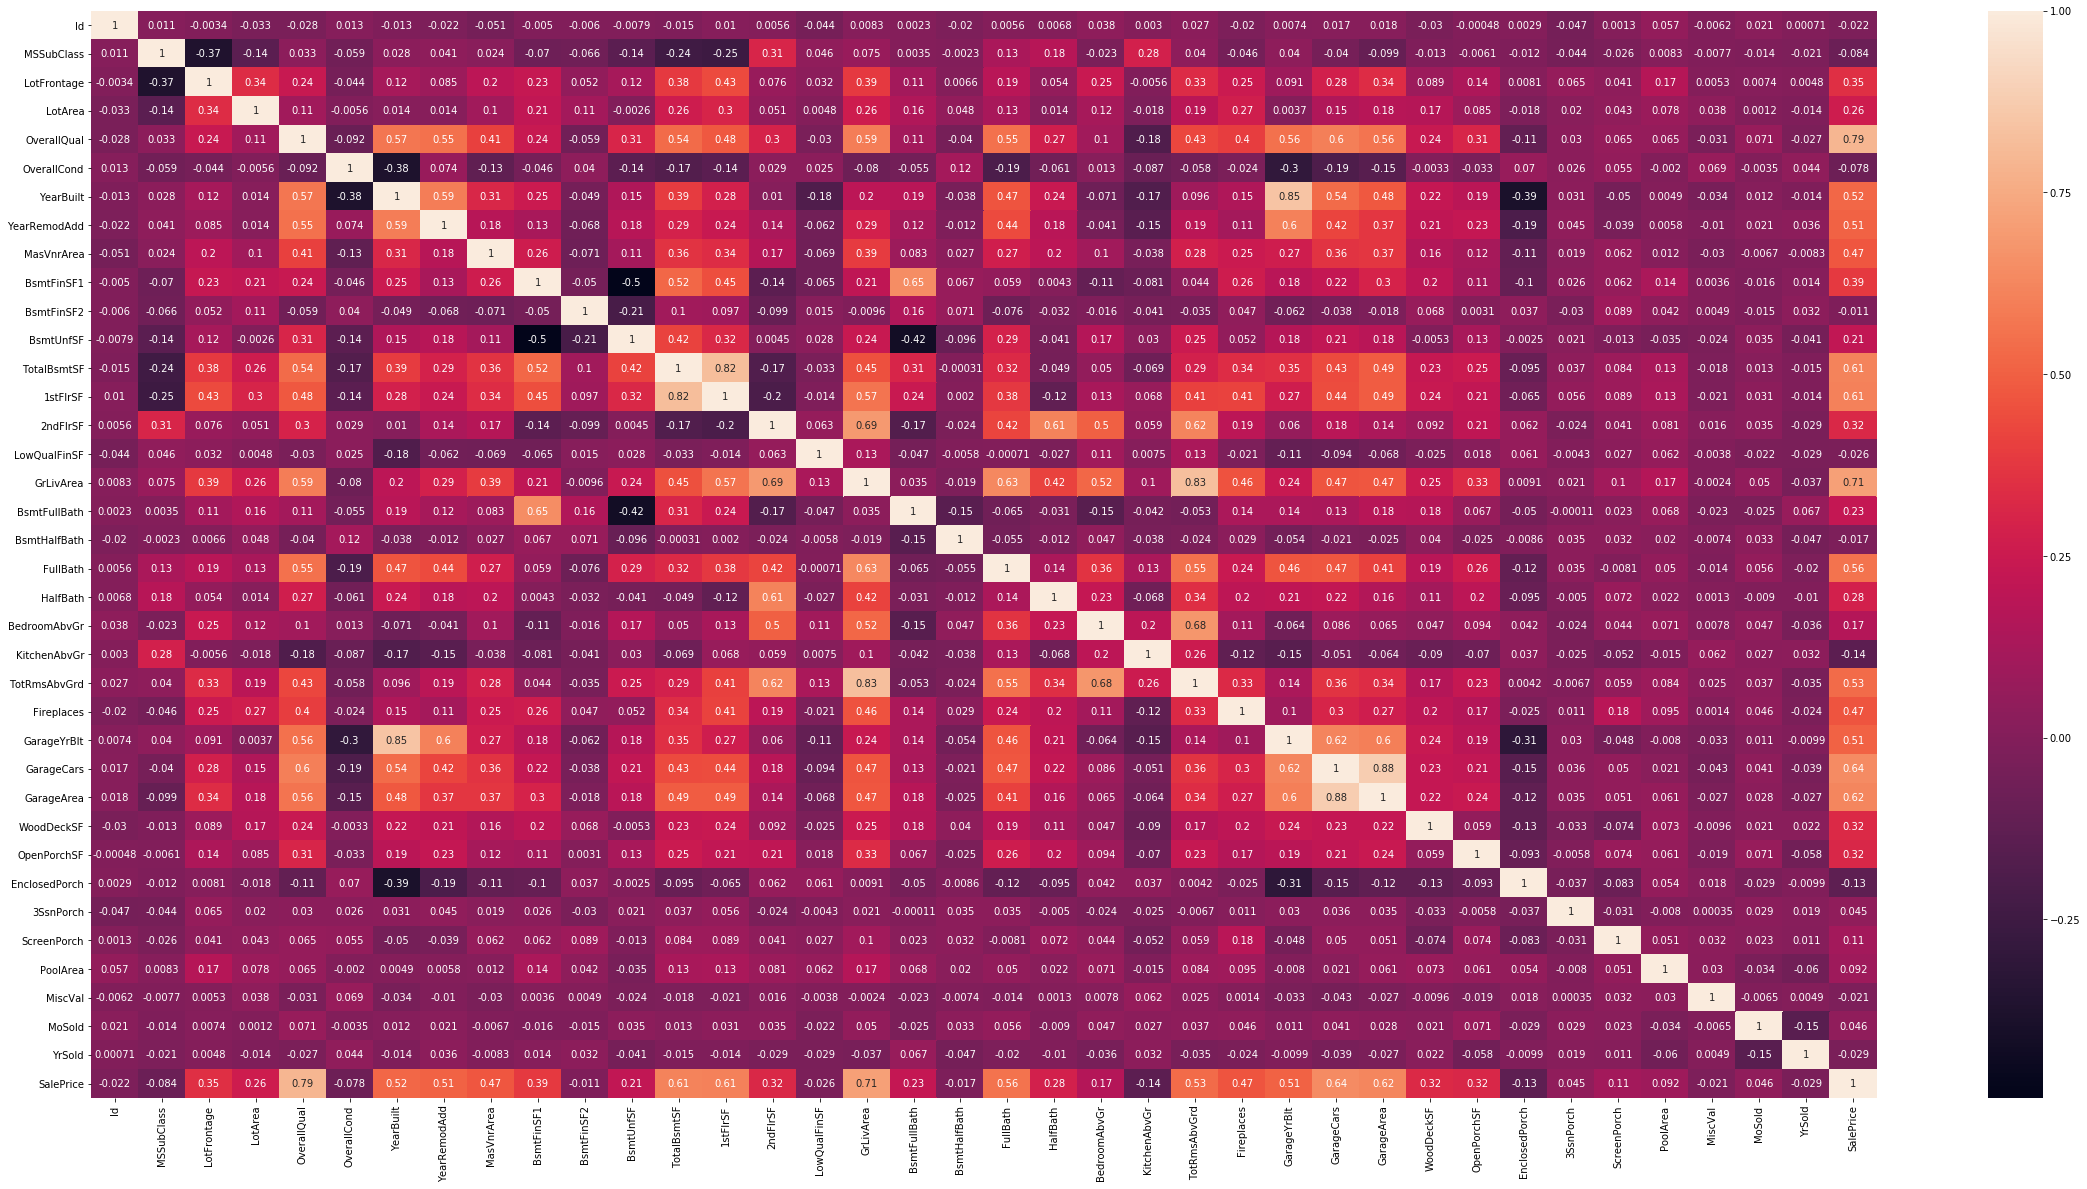

In [81]:
plt.figure(figsize=(40, 20))
sns.heatmap(housing_df.corr(), annot=True)
plt.show()

Correlation of Sales Price with other features

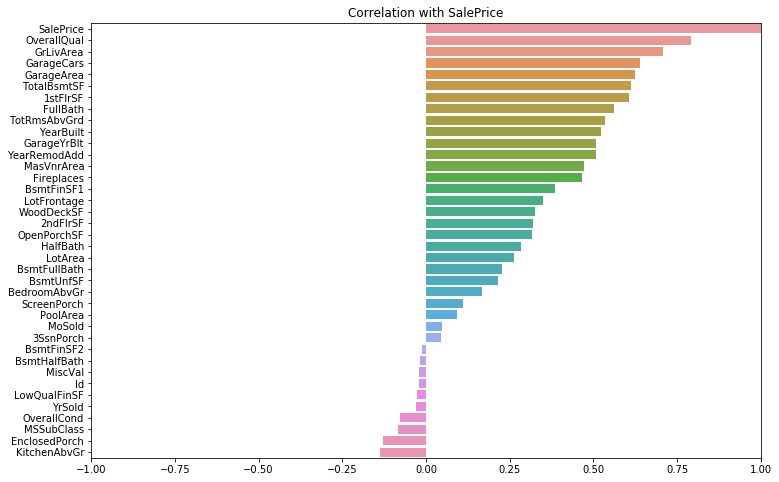

In [82]:
data = housing_df.corr()["SalePrice"].sort_values()[::-1]
plt.figure(figsize=(12, 8))
sns.barplot(x=data.values, y=data.index)
plt.title("Correlation with SalePrice")
plt.xlim(-1, 1)
plt.show()

Sort the feature with grater than 0.5 corr with sales price for ploting distribution with sales price

In [83]:
most_corr = data[data > 0.5]
most_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
GarageYrBlt     0.508043
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [84]:
most_corr_df = housing_df[most_corr.index]
most_corr_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,GarageYrBlt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003.0,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976.0,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2001.0,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1998.0,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000.0,2000


#### Pair plot

<Figure size 1440x720 with 0 Axes>

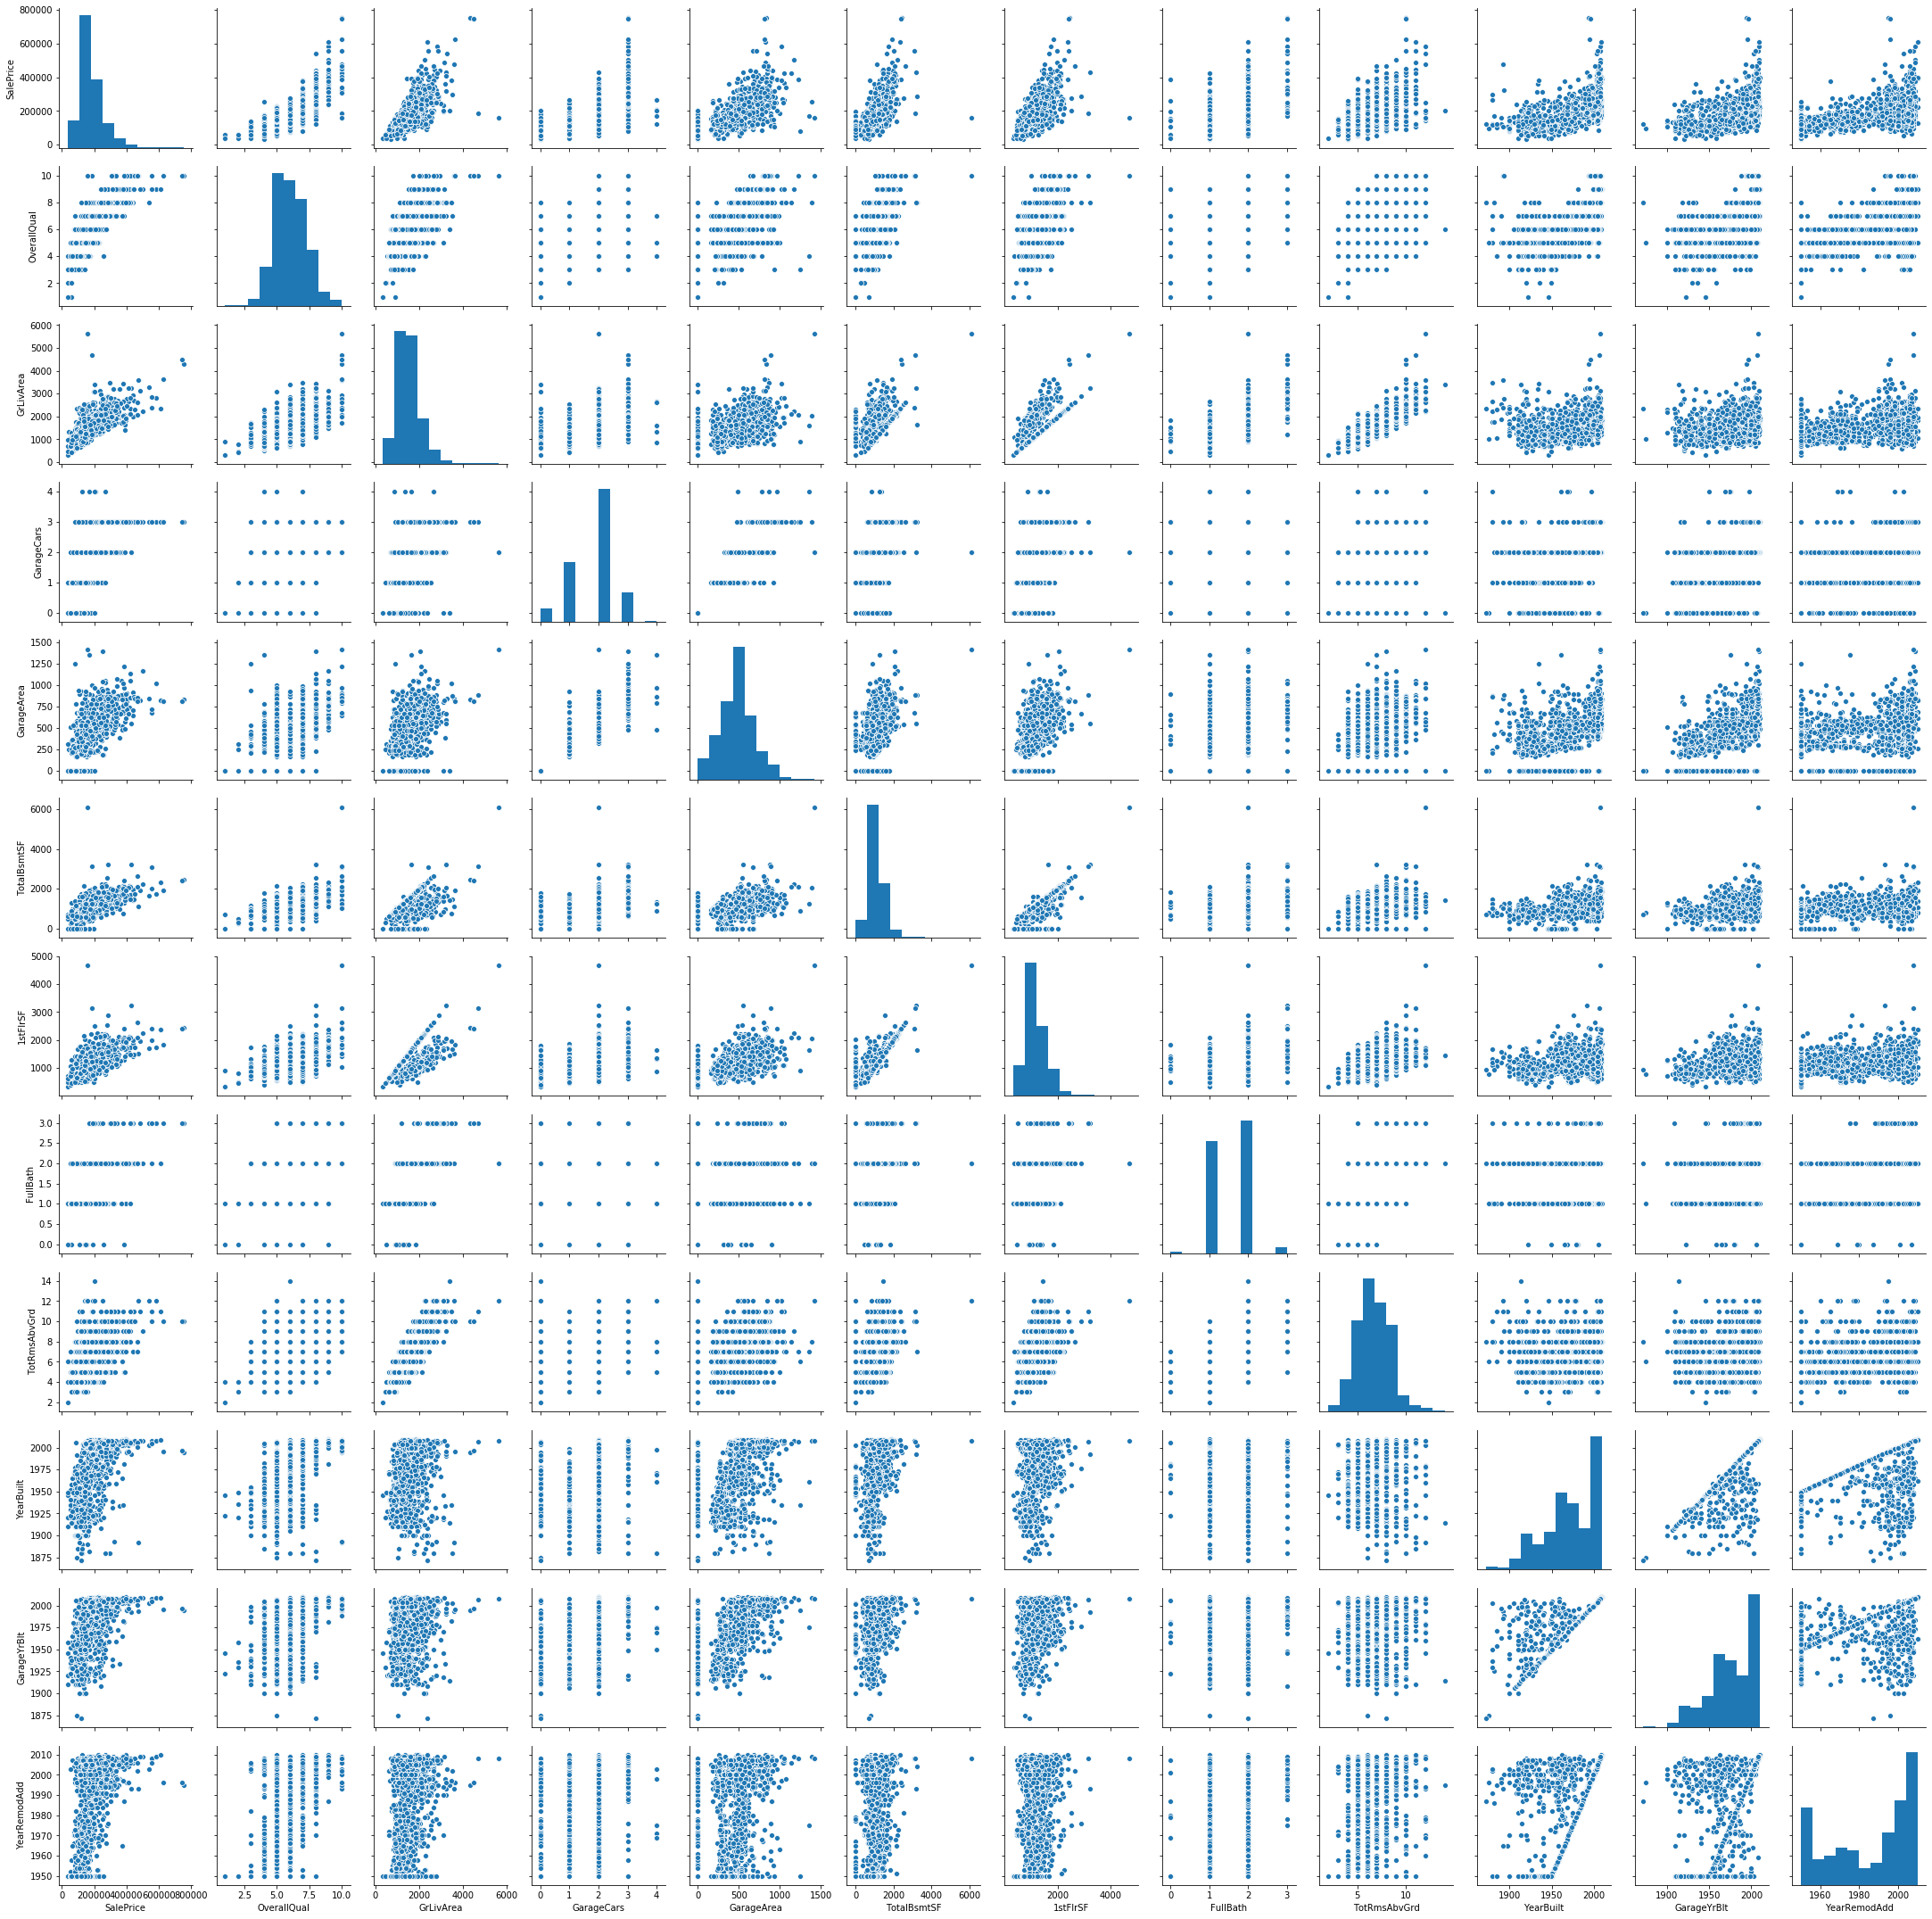

In [85]:
plt.figure(figsize=(20, 10))
sns.pairplot(most_corr_df)
plt.show()

From Above pair plot we can see that most of the features are linearly correlated with the sales price so we can procced with linear regression 

### Dummy Variable

In [86]:
housing_df = housing_df.drop("Id",  axis=1)
categorical_var = housing_df.loc[:, housing_df.dtypes == np.object].columns
scal_var = housing_df.loc[:, housing_df.dtypes != np.object].columns

In [87]:
housing_df_dummy = pd.get_dummies(housing_df[categorical_var], drop_first=True)
housing_df_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_no misc feature,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0

In [88]:
housing_df = pd.concat([housing_df, housing_df_dummy], axis=1)
housing_df = housing_df.drop(categorical_var, axis=1)
housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_no misc feature,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_Con

In [89]:
housing_df.shape

(1460, 260)

### Scaling

In [90]:
X = housing_df.drop("SalePrice", axis=1)
y = housing_df["SalePrice"]
scal_var = scal_var.drop("SalePrice")

scalar = StandardScaler()
X[scal_var] = scalar.fit_transform(X[scal_var])
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_no misc feature,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleTyp

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state =100)

### Model Building

#### Lasso 

In [92]:
# model coefficients
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# grid search cv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Set up cross validation scheme
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# specify the hyper parameters
param = {'alpha':[10.0, 20.0, 25.0, 30.0, 35.0, 40.0, 50.0, 100, 150, 200, 250, 300, 350, 400, 450]}

model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=param, 
                       scoring='r2', cv=folds, 
                        return_train_score=True, verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    5.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [10.0, 20.0, 25.0, 30.0, 35.0, 40.0, 50.0,
                                   100, 150, 200, 250, 300, 350, 400, 450]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [93]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.127458,0.041012,0.001397,4.894351e-04,10,{'alpha': 10.0},0.884892,0.749154,0.891091,0.900532,0.416482,0.768545,0.184499,15,0.954080,0.953405,0.951993,0.952345,0.954336,0.953232,0.000926
1,0.114499,0.041656,0.001396,4.880525e-04,20,{'alpha': 20.0},0.890188,0.758848,0.893581,0.911106,0.439570,0.778768,0.178027,14,0.952024,0.951042,0.949738,0.950327,0.952383,0.951103,0.000995
2,0.130052,0.006231,0.000998,6.289914e-07,25,{'alpha': 25.0},0.891755,0.763288,0.894493,0.913871,0.448859,0.782560,0.175118,13,0.950939,0.950043,0.948789,0.949152,0.951631,0.950111,0.001065
3,0.129448,0.013553,0.000997,1.609988e-06,30,{'alpha': 30.0},0.893255,0.768091,0.894975,0.915715,0.455524,0.785618,0.173002,10,0.949943,0.949031,0.947916,0.948008,0.950924,0.949164,0.001150
4,0.124666,0.010779,0.001996,6.302251e-04,35,{'alpha': 35.0},0.894609,0.772617,0.893294,0.917569,0.462352,0.788193,0.170550,8,0.949030,0.948066,0.947189,0.946900,0.950208,0.948279,0.001218


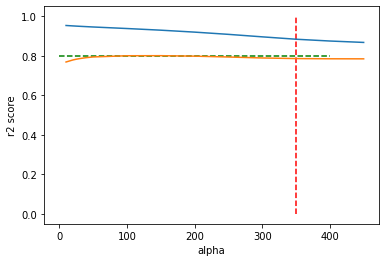

In [94]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.vlines(x=350, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.8, xmax=400, xmin=0, colors='g', linestyles='--')

plt.show()

In [95]:
# model with optimal alpha
# lasso regression
lm_lasso = Lasso(alpha=350)
lm_lasso.fit(X_train, y_train)

# predict
y_train_pred = lm_lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8677711204960827
0.8540285963316246


In [96]:
# lasso model parameters
model_parameters = list(lm_lasso.coef_)
model_parameters.insert(0, lm_lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
Lasso_params = pd.DataFrame({"Columns" :cols, "Parameters" : model_parameters})

In [97]:
Lasso_params = Lasso_params.sort_values(by = "Parameters", ascending = False)
Lasso_params

,Columns,Parameters
0,constant,188055.439
71,Neighborhood_NoRidge,37068.136
72,Neighborhood_NridgHt,24095.274
16,GrLivArea,23946.033
4,OverallQual,18086.125
171,BsmtExposure_Gd,15278.917
62,Neighborhood_Crawfor,13691.337
82,Condition1_Norm,11464.651
77,Neighborhood_Somerst,10069.632
26,GarageCars,7978.771


In [98]:
Lasso_params_count = (Lasso_params.Parameters != 0).sum()
Lasso_params_count

64

#### Ridge

In [99]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# specify the hyper parameters
param = {'alpha':[0.001,0.01, 0.1, 0.2, 0.4, 0.6, 1.0, 2.0, 3.0, 5.0, 10.0, 20, 30, 40]}

model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=param, 
                       scoring='r2', cv=folds, 
                        return_train_score=True, verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.6, 1.0, 2.0,
                                   3.0, 5.0, 10.0, 20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [100]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015758,0.009106,0.001994,0.000631,0.001,{'alpha': 0.001},0.667355,0.704586,0.879540,0.864502,0.612676,0.745655,0.107261,14,0.958310,0.955131,0.953771,0.956769,0.959013,0.956599,0.001946
1,0.010772,0.000746,0.001794,0.000399,0.01,{'alpha': 0.01},0.852950,0.715298,0.877799,0.868858,0.425531,0.748190,0.171717,13,0.956400,0.955041,0.953705,0.954521,0.956627,0.955259,0.001112
2,0.008976,0.000892,0.001596,0.000489,0.1,{'alpha': 0.1},0.881222,0.761366,0.855261,0.875803,0.407908,0.756435,0.179444,12,0.952663,0.951873,0.951064,0.950893,0.955108,0.952320,0.001530
3,0.007580,0.001353,0.001196,0.000399,0.2,{'alpha': 0.2},0.884583,0.776405,0.838559,0.875918,0.430244,0.761263,0.169743,11,0.948193,0.947764,0.947666,0.946631,0.953909,0.948833,0.002590
4,0.008578,0.001017,0.001595,0.000488,0.4,{'alpha': 0.4},0.885414,0.786183,0.821129,0.874669,0.459545,0.765506,0.157084,10,0.940545,0.941355,0.942099,0.939300,0.951384,0.942937,0.004324


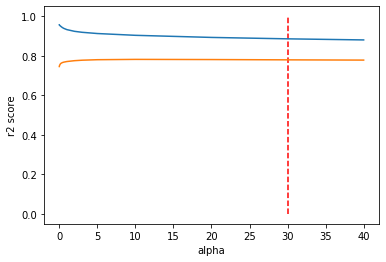

In [101]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.vlines(x=30, ymax=1, ymin=0, colors='r', linestyles='--')
plt.show()

In [102]:
# model with optimal alpha
# Ridge regression
lm_ridge = Ridge(alpha=30)
lm_ridge.fit(X_train, y_train)

# predict
y_train_pred = lm_ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8801970365029705
0.8678349750172321


In [103]:
# Ridge model parameters
model_parameters = list(lm_ridge.coef_)
model_parameters.insert(0, lm_ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
cols = list(cols)
Ridge_params = pd.DataFrame({"Columns" :cols, "Parameters" : model_parameters})

In [104]:
Ridge_params = Ridge_params.sort_values(by = "Parameters", ascending = False)
Ridge_params

,Columns,Parameters
0,constant,170340.993
71,Neighborhood_NoRidge,19326.941
4,OverallQual,16512.167
72,Neighborhood_NridgHt,15883.679
16,GrLivArea,14499.679
171,BsmtExposure_Gd,12836.985
14,2ndFlrSF,12311.518
62,Neighborhood_Crawfor,10822.961
82,Condition1_Norm,10428.165
118,RoofMatl_WdShngl,9590.715


In [105]:
Ridge_params_count = (Ridge_params.Parameters != 0).sum()
Ridge_params_count

256